# Import data and processing

In [1]:
import numpy as np
import pandas as pd
import warnings

pd.options.display.max_rows = 500
pd.options.display.max_columns = 50

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("PGATOUR_meta2.csv")
df.head()

,Player,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,AVG_Driving_DISTANCE,UP_AND_DOWN_%,PAR_OR_BETTER,MISSED_GIR,FAIRWAY_HIT_%,FAIRWAYS_HIT,POSSIBLE_FAIRWAYS,GIR_RANK,GOING_FOR_GREEN_IN_2%,ATTEMPTS_GFG,NON-ATTEMPTS_GFG,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,HOLE_OUTS,SAND_SAVE%,...,SLOWEST_BALL_SPEED,AVG_SMASH_FACTOR,HIGHEST_SF,LOWEST_SF,AVG_LAUNCH_ANGLE,LOWEST_LAUNCH_ANGLE,STEEPEST_LAUNCH_ANGLE,AVG_SPIN_RATE,HIGHEST_SPIN_RATE,LOWEST_SPIN_RATE,AVG_HANG_TIME,LONGEST_ACT.HANG_TIME,SHORTEST_ACT.HANG_TIME,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE,MONEY,COUNTRY
0,Aaron Baddeley,27,342,0,1,5275.0,84,-0.062,-4.064,66,295.5,62.09,303,488,52.18,538,1031,165,55.60,139,111,-86,-2,20,56.25,...,166.01,1.498,1.519,1.446,14.71,10.45,18.49,2683.0,3761,2157,6.2,7.6,0.8,278.2,312.6,237.1,70.850,5518,78,16.24,228,1404,37,725928,Australia
1,Aaron Wise,27,1498,1,4,4119.0,82,0.245,17.134,70,303.4,56.59,249,440,63.29,688,1087,45,60.38,157,103,-97,-3,11,48.80,...,167.50,1.502,1.516,1.444,13.96,9.25,17.49,2561.1,4507,1903,6.5,7.6,4.7,282.5,314.6,255.7,70.276,5888,84,16.53,250,1512,22,3151607,United States
2,Abraham Ancer,29,909,0,5,4708.0,94,-0.052,-4.076,79,296.3,63.23,356,563,63.06,811,1286,108,59.87,179,120,-77,-18,13,54.38,...,160.94,1.498,1.519,1.441,13.94,11.32,16.68,2599.9,6085,1700,6.4,7.6,4.6,275.1,305.8,223.5,70.659,6745,96,14.76,255,1728,27,1655230,Mexico
3,Adam Hadwin,24,1054,0,3,4563.0,88,0.145,8.729,60,289.7,59.04,284,481,65.18,760,1166,74,58.87,146,102,-68,-1,12,48.15,...,162.51,1.506,1.519,1.472,13.67,10.45,17.11,2952.0,6446,2175,6.5,7.7,4.0,277.7,307.7,246.9,70.750,6280,89,15.61,250,1602,30,1823408,Canada
4,Adam Schenk,28,239,0,1,5378.0,86,0.130,8.558,66,305.5,54.55,252,462,57.67,643,1115,67,62.40,151,91,-81,4,8,42.36,...,171.12,1.472,1.508,1.426,13.47,10.33,16.10,3006.1,3795,1913,6.5,7.7,4.0,283.0,305.0,236.8,71.370,5683,80,16.88,243,1440,26,474923,United States


In [3]:
df.dtypes

Player                        object
EVENTS_PLAYED                  int64
POINTS                         int64
NUMBER_OF_WINS                 int64
NUMBER_OF_TOP_Tens             int64
POINTS_BEHIND_LEAD           float64
ROUNDS_PLAYED                  int64
SG_PUTTING_PER_ROUND         float64
TOTAL_SG:PUTTING             float64
MEASURED_ROUNDS                int64
AVG_Driving_DISTANCE         float64
UP_AND_DOWN_%                float64
PAR_OR_BETTER                  int64
MISSED_GIR                     int64
FAIRWAY_HIT_%                float64
FAIRWAYS_HIT                  object
POSSIBLE_FAIRWAYS              int64
GIR_RANK                       int64
GOING_FOR_GREEN_IN_2%        float64
ATTEMPTS_GFG                   int64
NON-ATTEMPTS_GFG               int64
RTP-GOING_FOR_THE_GREEN        int64
RTP-NOT_GOING_FOR_THE_GRN      int64
HOLE_OUTS                      int64
SAND_SAVE%                   float64
NUMBER_OF_SAVES                int64
NUMBER_OF_BUNKERS              int64
T

In [4]:
df['FAIRWAYS_HIT' ]= df['FAIRWAYS_HIT'].apply(lambda x: x.replace(',',''))
df['FAIRWAYS_HIT'] = df['FAIRWAYS_HIT'].astype('int64')
df['TOTAL_DRIVES' ]= df['TOTAL_DRIVES'].apply(lambda x: x.replace(',',''))
df['TOTAL_DRIVES'] = df['TOTAL_DRIVES'].astype('int64')

In [5]:
df = df.fillna(df.mean()['POINTS_BEHIND_LEAD'])

In [6]:
df.describe(include=['float64'])

,POINTS_BEHIND_LEAD,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,AVG_Driving_DISTANCE,UP_AND_DOWN_%,FAIRWAY_HIT_%,GOING_FOR_GREEN_IN_2%,SAND_SAVE%,Three_PUTT%,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,ROUGH_TENDNECY%,FAIRWAY_BUNKER%,AVG_CLUB_HEAD_SPEED,FASTEST_CH_SPEED,SLOWEST_CH_SPEED,AVG_BALL_SPEED,FASTEST_BALL_SPEED,SLOWEST_BALL_SPEED,AVG_SMASH_FACTOR,HIGHEST_SF,LOWEST_SF,AVG_LAUNCH_ANGLE,LOWEST_LAUNCH_ANGLE,STEEPEST_LAUNCH_ANGLE,AVG_SPIN_RATE,AVG_HANG_TIME,LONGEST_ACT.HANG_TIME,SHORTEST_ACT.HANG_TIME,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,MAKES_BOGEY%
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.00000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,4896.262887,0.051708,3.111672,296.756923,58.597897,61.053846,56.224821,49.934462,2.866923,0.136246,0.042308,0.061779,0.032108,10.817179,28.773949,6.109744,113.997846,118.370051,110.116872,169.622667,174.298513,163.605231,1.487728,1.515636,1.431810,11.060974,7.00041,14.887333,2633.989744,6.347179,7.638462,3.209744,278.155385,305.030769,244.854359,70.893369,16.483897
std,606.455511,0.313897,18.320074,8.191270,3.473569,5.079533,9.138289,5.791218,0.642765,0.752243,0.418211,0.396112,0.220894,6.999289,3.939820,1.105403,3.902298,4.183791,3.819907,5.764802,5.814774,6.076666,0.014070,0.005842,0.026439,1.382925,1.63012,1.631474,209.331951,0.252676,0.331985,1.155827,10.060564,12.552019,13.149478,0.820646,2.095008
min,2328.000000,-0.750000,-42.673000,278.400000,44.010000,40.850000,28.360000,33.800000,1.480000,-3.586000,-1.585000,-1.586000,-0.924000,1.240000,16.670000,3.100000,105.270000,109.160000,102.150000,157.170000,160.260000,146.500000,1.423000,1.473000,1.337000,7.140000,1.25000,10.700000,2127.300000,5.500000,6.800000,0.500000,249.800000,271.600000,192.800000,68.702000,12.200000
25%,4601.500000,-0.146500,-8.024000,291.050000,56.475000,57.255000,50.485000,45.965000,2.405000,-0.217500,-0.144500,-0.150500,-0.124000,5.765000,26.235000,5.400000,111.290000,115.570000,107.355000,165.720000,170.455000,159.415000,1.483000,1.514000,1.417000,10.205000,5.88000,13.720000,2508.300000,6.200000,7.500000,2.400000,270.900000,295.600000,237.050000,70.440500,15.205000
50%,5030.000000,0.059000,3.967000,296.200000,58.480000,61.090000,56.710000,49.650000,2.840000,0.143000,0.073000,0.059000,0.022000,8.720000,28.760000,6.100000,113.630000,118.000000,109.900000,169.120000,173.980000,163.200000,1.490000,1.517000,1.432000,11.110000,6.96000,14.850000,2625.800000,6.400000,7.600000,3.400000,278.200000,304.500000,245.900000,70.850000,16.280000
75%,5349.500000,0.237000,14.503000,301.650000,60.925000,64.430000,62.450000,53.375000,3.195000,0.562500,0.294000,0.324500,0.197500,13.990000,31.220000,6.800000,116.770000,120.880000,112.565000,173.435000,178.170000,167.510000,1.498000,1.518500,1.450000,12.095000,8.09000,16.025000,2757.700000,6.500000,7.800000,4.100000,283.950000,313.600000,253.100000,71.324000,17.420000
max,5607.000000,0.862000,60.061000,320.200000,66.590000,74.330000,78.440000,66.000000,5.090000,1.987000,1.006000,0.990000,0.632000,33.920000,42.640000,9.500000,124.670000,129.200000,118.730000,182.220000,187.500000,177.340000,1.507000,1.539000,1.492000,14.710000,11.32000,18.620000,3346.100000,6.900000,8.700000,5.100000,302.600000,337.700000,275.700000,74.891000,28.250000


We can know that POINTS_BEHIND_LEAD = 5607(MAX) - POINTS from the data. So it coundn't be a variable.

In [7]:
df.describe(include=['int64'])

,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,ROUNDS_PLAYED,MEASURED_ROUNDS,PAR_OR_BETTER,MISSED_GIR,FAIRWAYS_HIT,POSSIBLE_FAIRWAYS,GIR_RANK,ATTEMPTS_GFG,NON-ATTEMPTS_GFG,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,HOLE_OUTS,NUMBER_OF_SAVES,NUMBER_OF_BUNKERS,TOTAL_O/U_PAR,TOTAL_3_PUTTS,TOTAL_DRIVES_FOR_320+,TOTAL_DRIVES,TOTAL_ROUGH,TOTAL_FAIRWAY_BUNKERS,HIGHEST_SPIN_RATE,LOWEST_SPIN_RATE,TOTAL_STROKES,TOTAL_ROUNDS,BOGEYS_MADE,HOLES_PLAYED,AGE,MONEY
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02
mean,24.174359,745.974359,0.241026,2.651282,78.358974,59.928205,256.615385,437.887179,620.907692,1015.025641,97.923077,124.148718,96.692308,-67.748718,-6.779487,10.994872,61.984615,124.164103,40.189744,38.815385,92.230769,859.584615,243.964103,52.128205,5085.112821,1736.723077,5328.810256,75.497436,222.194872,1359.000000,32.887179,1.653204e+06
std,4.151805,700.518059,0.599277,2.201554,14.039134,13.997606,53.353816,86.863725,139.350784,201.438703,56.456709,34.816950,31.008108,21.775647,9.887907,4.345275,16.237121,29.040742,13.129407,10.674991,62.617256,195.369058,59.698329,15.032575,1364.666542,219.316194,1005.287126,14.465520,41.704446,260.378571,5.668469,1.489543e+06
min,15.000000,10.000000,0.000000,0.000000,46.000000,30.000000,136.000000,227.000000,268.000000,531.000000,1.000000,38.000000,35.000000,-128.000000,-51.000000,1.000000,23.000000,57.000000,15.000000,12.000000,8.000000,420.000000,93.000000,18.000000,2819.000000,1400.000000,3261.000000,45.000000,123.000000,810.000000,21.000000,2.487800e+04
25%,21.000000,267.500000,0.000000,1.000000,67.000000,49.000000,214.500000,373.500000,522.000000,857.000000,49.500000,100.500000,74.500000,-80.000000,-12.000000,8.000000,50.500000,103.000000,31.000000,31.500000,48.000000,702.000000,199.000000,41.000000,4127.500000,1541.500000,4529.000000,64.000000,193.500000,1152.000000,29.000000,5.752075e+05
50%,24.000000,587.000000,0.000000,2.000000,80.000000,60.000000,259.000000,445.000000,613.000000,1031.000000,98.000000,124.000000,96.000000,-67.000000,-7.000000,10.000000,62.000000,125.000000,38.000000,38.000000,75.000000,864.000000,243.000000,52.000000,4931.000000,1714.000000,5379.000000,76.000000,223.000000,1368.000000,33.000000,1.287040e+06
75%,27.000000,1038.000000,0.000000,4.000000,88.500000,70.000000,295.000000,492.000000,713.000000,1164.000000,146.500000,150.000000,114.000000,-55.000000,-1.000000,14.000000,73.000000,143.500000,49.000000,45.000000,121.000000,999.000000,281.500000,62.000000,5869.000000,1900.000000,6106.500000,87.000000,251.000000,1566.000000,36.000000,2.242648e+06
max,32.000000,5617.000000,3.000000,11.000000,110.000000,92.000000,392.000000,635.000000,1060.000000,1454.000000,195.000000,227.000000,228.000000,-22.000000,27.000000,25.000000,108.000000,193.000000,74.000000,73.000000,307.000000,1344.000000,428.000000,94.000000,9640.000000,2314.000000,7515.000000,107.000000,330.000000,1926.000000,49.000000,8.225921e+06


In [8]:
df.describe(include=['object', 'category'])

,Player,COUNTRY
count,195,195
unique,195,22
top,Wesley Bryan,United States
freq,1,137


In [9]:
df.head()

,Player,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,AVG_Driving_DISTANCE,UP_AND_DOWN_%,PAR_OR_BETTER,MISSED_GIR,FAIRWAY_HIT_%,FAIRWAYS_HIT,POSSIBLE_FAIRWAYS,GIR_RANK,GOING_FOR_GREEN_IN_2%,ATTEMPTS_GFG,NON-ATTEMPTS_GFG,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,HOLE_OUTS,SAND_SAVE%,...,SLOWEST_BALL_SPEED,AVG_SMASH_FACTOR,HIGHEST_SF,LOWEST_SF,AVG_LAUNCH_ANGLE,LOWEST_LAUNCH_ANGLE,STEEPEST_LAUNCH_ANGLE,AVG_SPIN_RATE,HIGHEST_SPIN_RATE,LOWEST_SPIN_RATE,AVG_HANG_TIME,LONGEST_ACT.HANG_TIME,SHORTEST_ACT.HANG_TIME,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE,MONEY,COUNTRY
0,Aaron Baddeley,27,342,0,1,5275.0,84,-0.062,-4.064,66,295.5,62.09,303,488,52.18,538,1031,165,55.60,139,111,-86,-2,20,56.25,...,166.01,1.498,1.519,1.446,14.71,10.45,18.49,2683.0,3761,2157,6.2,7.6,0.8,278.2,312.6,237.1,70.850,5518,78,16.24,228,1404,37,725928,Australia
1,Aaron Wise,27,1498,1,4,4119.0,82,0.245,17.134,70,303.4,56.59,249,440,63.29,688,1087,45,60.38,157,103,-97,-3,11,48.80,...,167.50,1.502,1.516,1.444,13.96,9.25,17.49,2561.1,4507,1903,6.5,7.6,4.7,282.5,314.6,255.7,70.276,5888,84,16.53,250,1512,22,3151607,United States
2,Abraham Ancer,29,909,0,5,4708.0,94,-0.052,-4.076,79,296.3,63.23,356,563,63.06,811,1286,108,59.87,179,120,-77,-18,13,54.38,...,160.94,1.498,1.519,1.441,13.94,11.32,16.68,2599.9,6085,1700,6.4,7.6,4.6,275.1,305.8,223.5,70.659,6745,96,14.76,255,1728,27,1655230,Mexico
3,Adam Hadwin,24,1054,0,3,4563.0,88,0.145,8.729,60,289.7,59.04,284,481,65.18,760,1166,74,58.87,146,102,-68,-1,12,48.15,...,162.51,1.506,1.519,1.472,13.67,10.45,17.11,2952.0,6446,2175,6.5,7.7,4.0,277.7,307.7,246.9,70.750,6280,89,15.61,250,1602,30,1823408,Canada
4,Adam Schenk,28,239,0,1,5378.0,86,0.130,8.558,66,305.5,54.55,252,462,57.67,643,1115,67,62.40,151,91,-81,4,8,42.36,...,171.12,1.472,1.508,1.426,13.47,10.33,16.10,3006.1,3795,1913,6.5,7.7,4.0,283.0,305.0,236.8,71.370,5683,80,16.88,243,1440,26,474923,United States


# Data visualization

In [10]:
#importing

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

['EVENTS_PLAYED', 'NUMBER_OF_WINS', 'NUMBER_OF_TOP_Tens', 'ROUNDS_PLAYED']


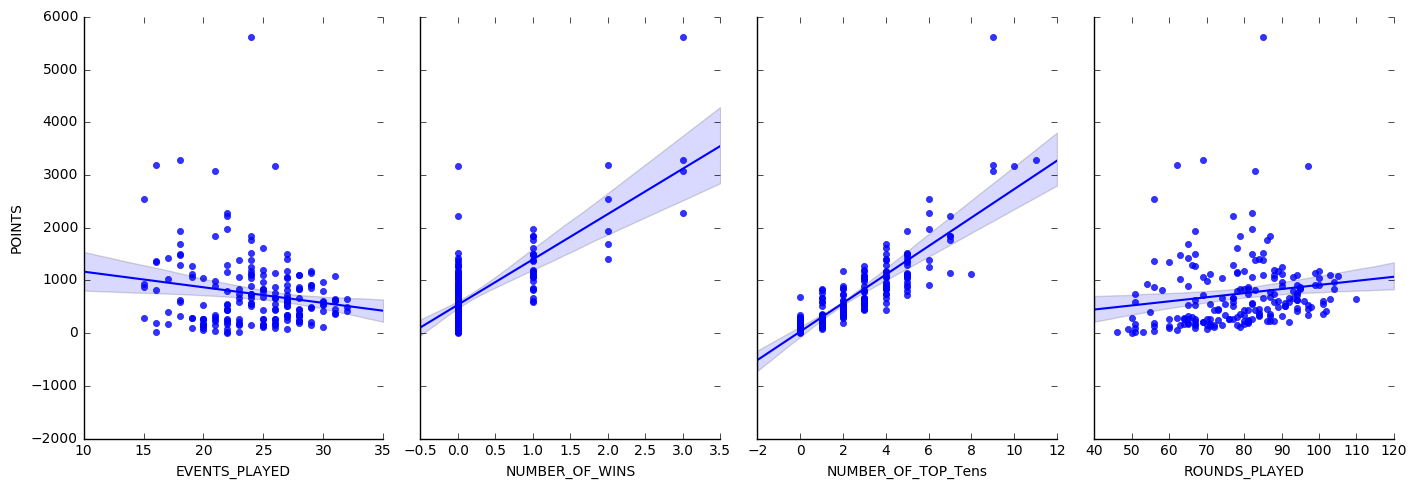

['SG_PUTTING_PER_ROUND', 'TOTAL_SG:PUTTING', 'MEASURED_ROUNDS', 'AVG_Driving_DISTANCE']


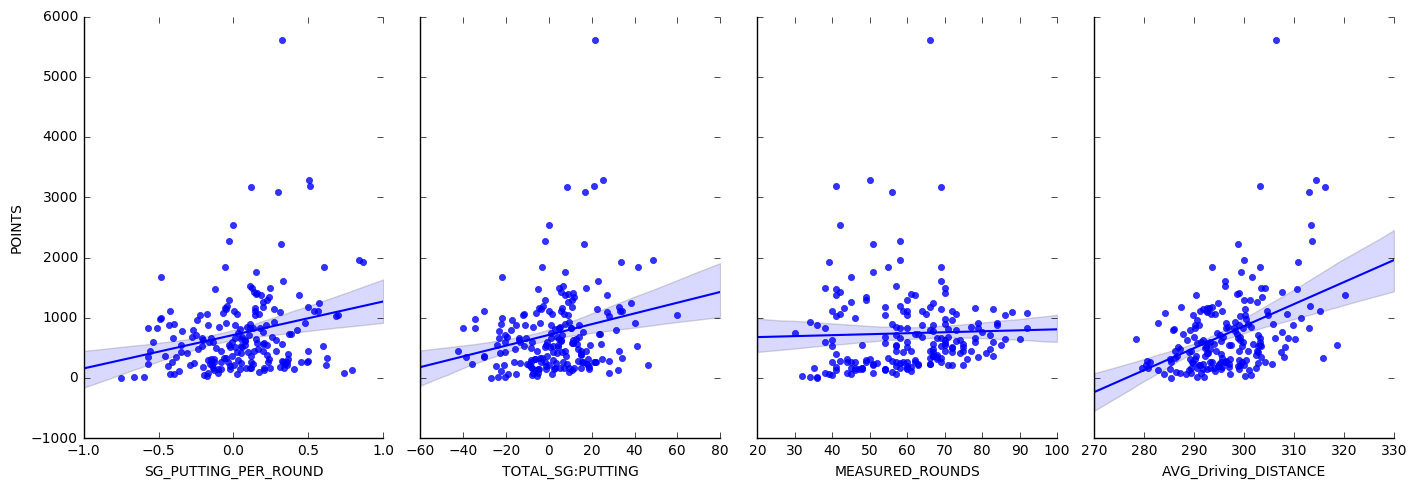

['UP_AND_DOWN_%', 'PAR_OR_BETTER', 'MISSED_GIR', 'FAIRWAY_HIT_%']


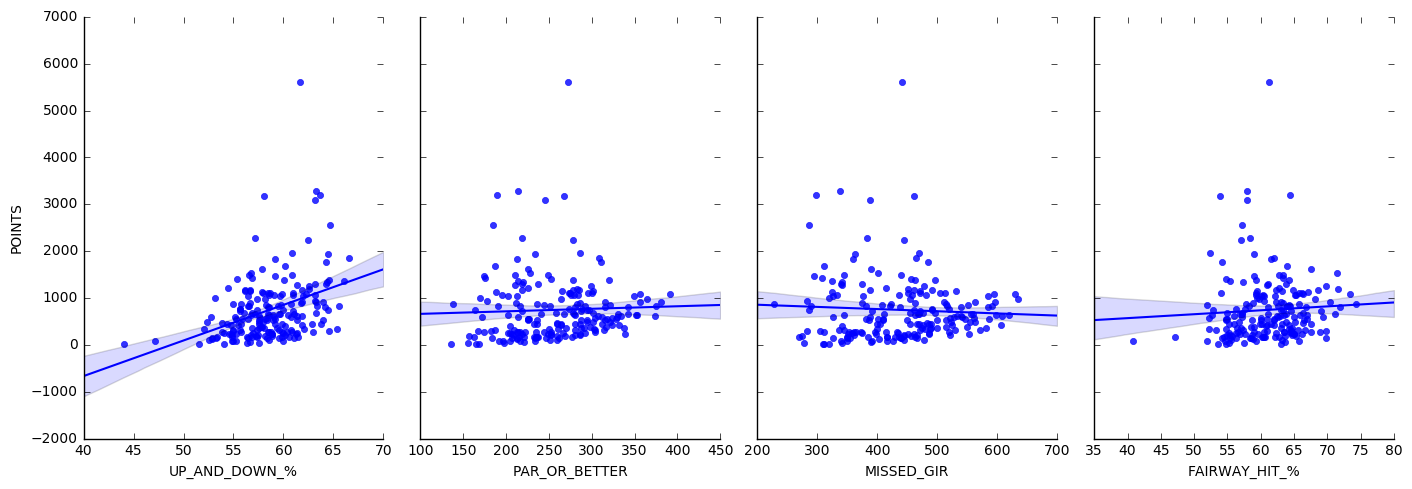

['FAIRWAYS_HIT', 'POSSIBLE_FAIRWAYS', 'GIR_RANK', 'GOING_FOR_GREEN_IN_2%']


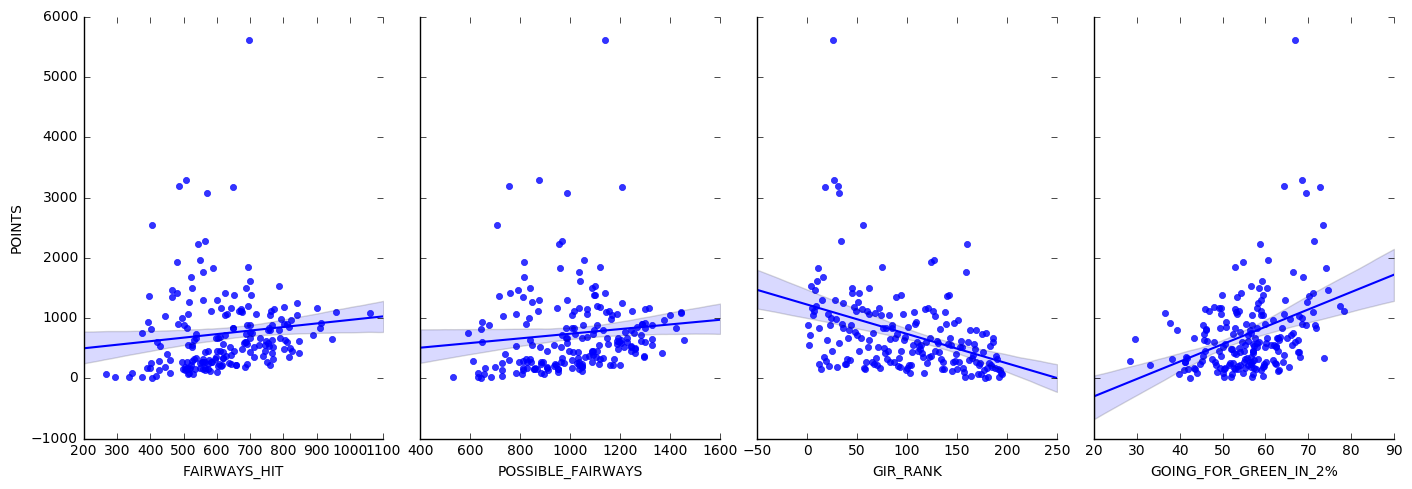

['ATTEMPTS_GFG', 'NON-ATTEMPTS_GFG', 'RTP-GOING_FOR_THE_GREEN', 'RTP-NOT_GOING_FOR_THE_GRN']


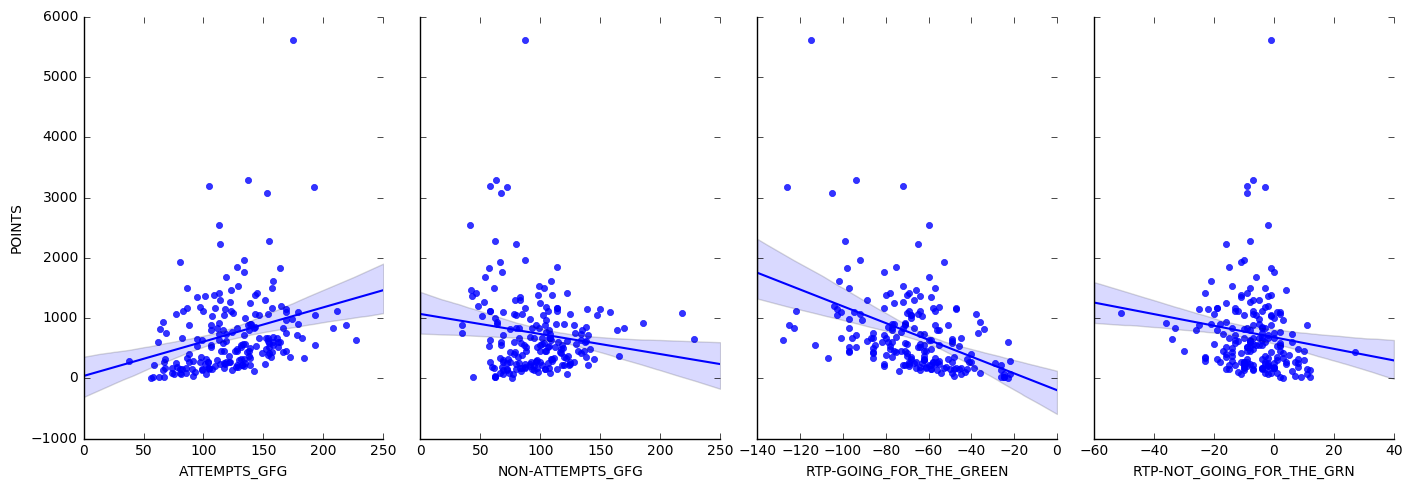

['HOLE_OUTS', 'SAND_SAVE%', 'NUMBER_OF_SAVES', 'NUMBER_OF_BUNKERS']


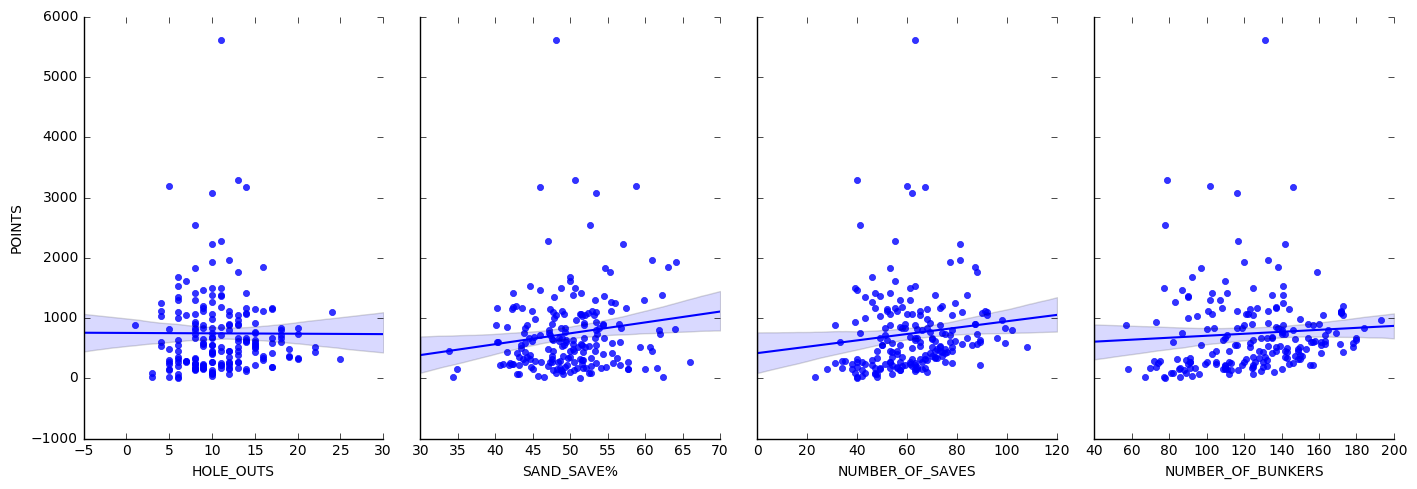

['TOTAL_O/U_PAR', 'Three_PUTT%', 'TOTAL_3_PUTTS', 'SG_PER_ROUND']


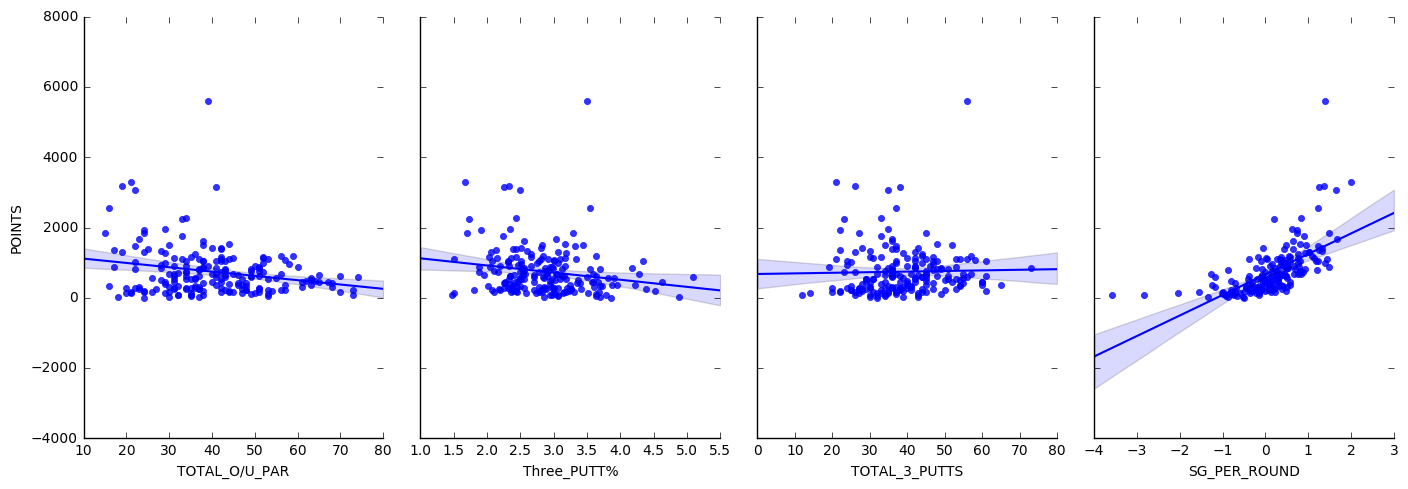

['SG:OTT', 'SG:APR', 'SG:ARG', 'DRIVES_320+%']


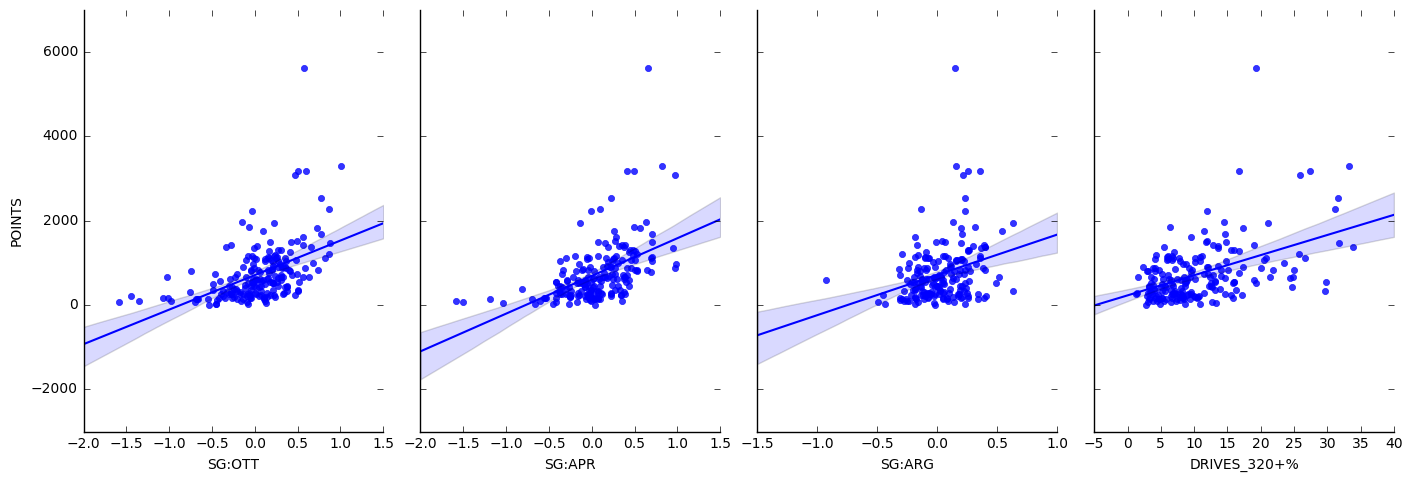

['TOTAL_DRIVES_FOR_320+', 'TOTAL_DRIVES', 'ROUGH_TENDNECY%', 'TOTAL_ROUGH']


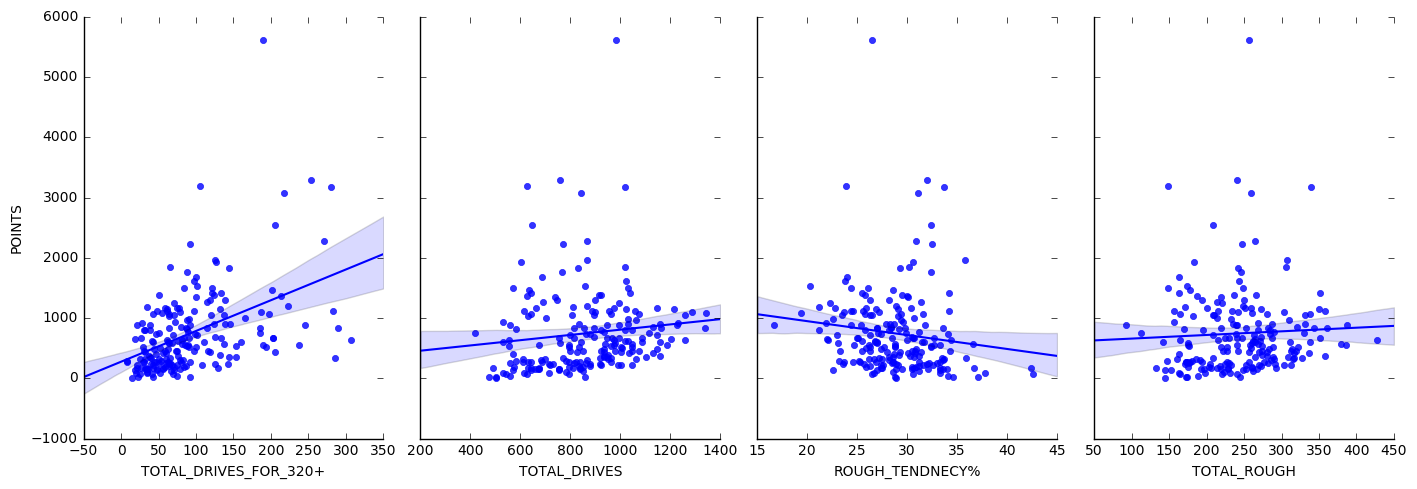

['FAIRWAY_BUNKER%', 'TOTAL_FAIRWAY_BUNKERS', 'AVG_CLUB_HEAD_SPEED', 'FASTEST_CH_SPEED']


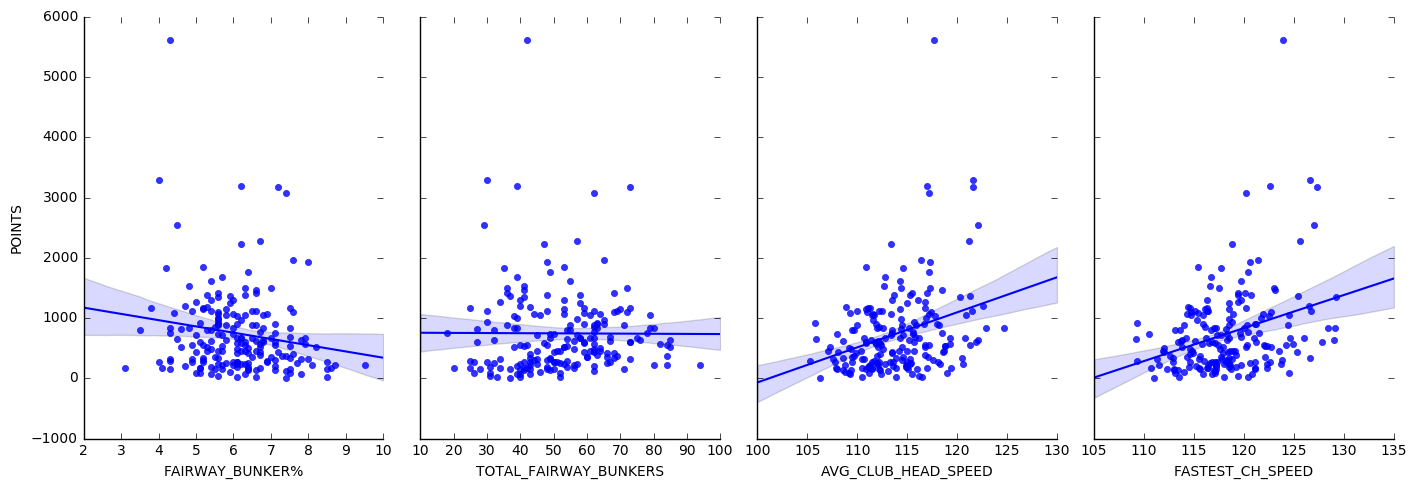

['SLOWEST_CH_SPEED', 'AVG_BALL_SPEED', 'FASTEST_BALL_SPEED', 'SLOWEST_BALL_SPEED']


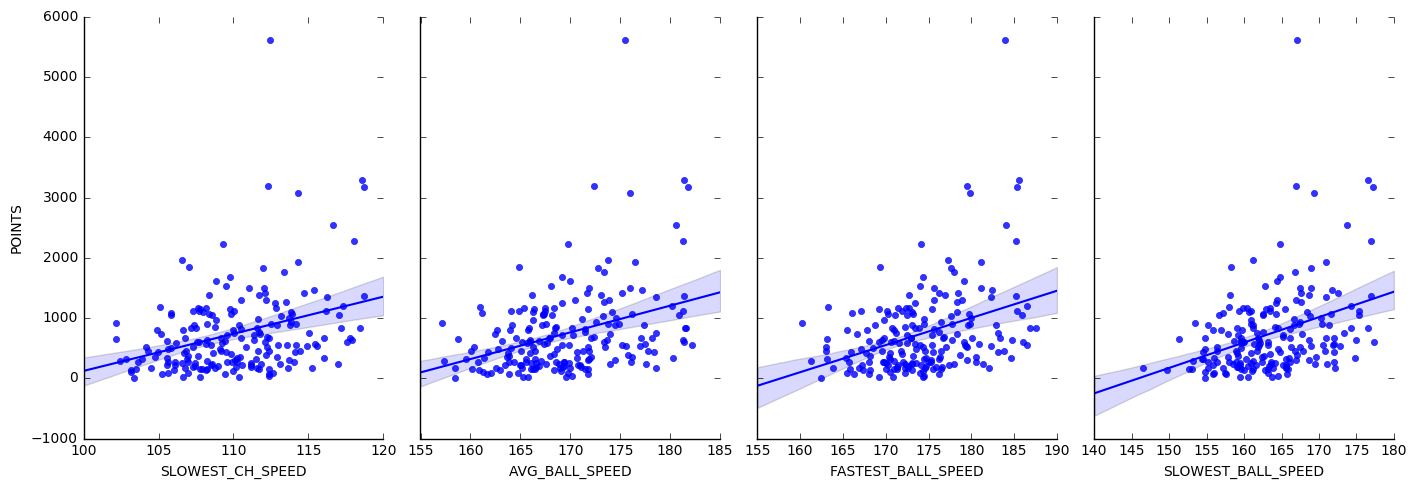

['AVG_SMASH_FACTOR', 'HIGHEST_SF', 'LOWEST_SF', 'AVG_LAUNCH_ANGLE']


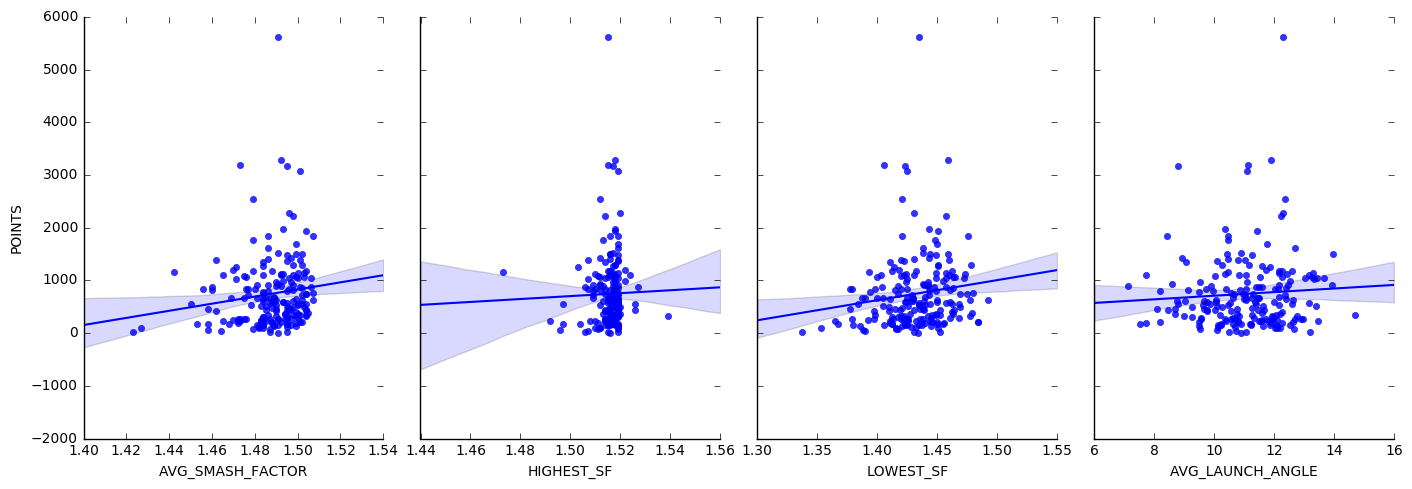

['LOWEST_LAUNCH_ANGLE', 'STEEPEST_LAUNCH_ANGLE', 'AVG_SPIN_RATE', 'HIGHEST_SPIN_RATE']


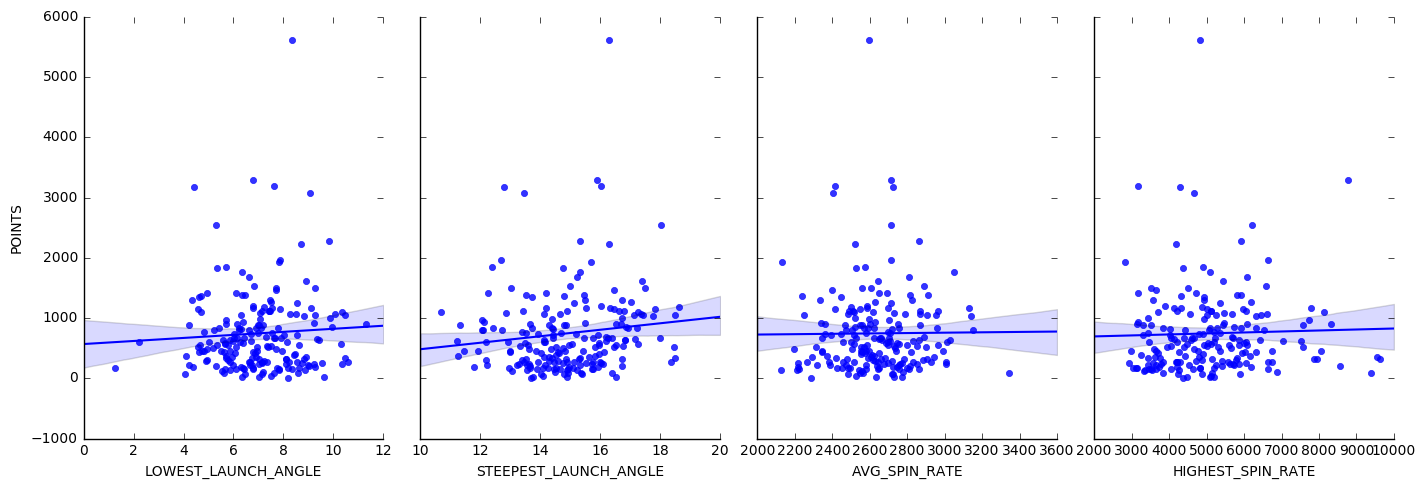

['LOWEST_SPIN_RATE', 'AVG_HANG_TIME', 'LONGEST_ACT.HANG_TIME', 'SHORTEST_ACT.HANG_TIME']


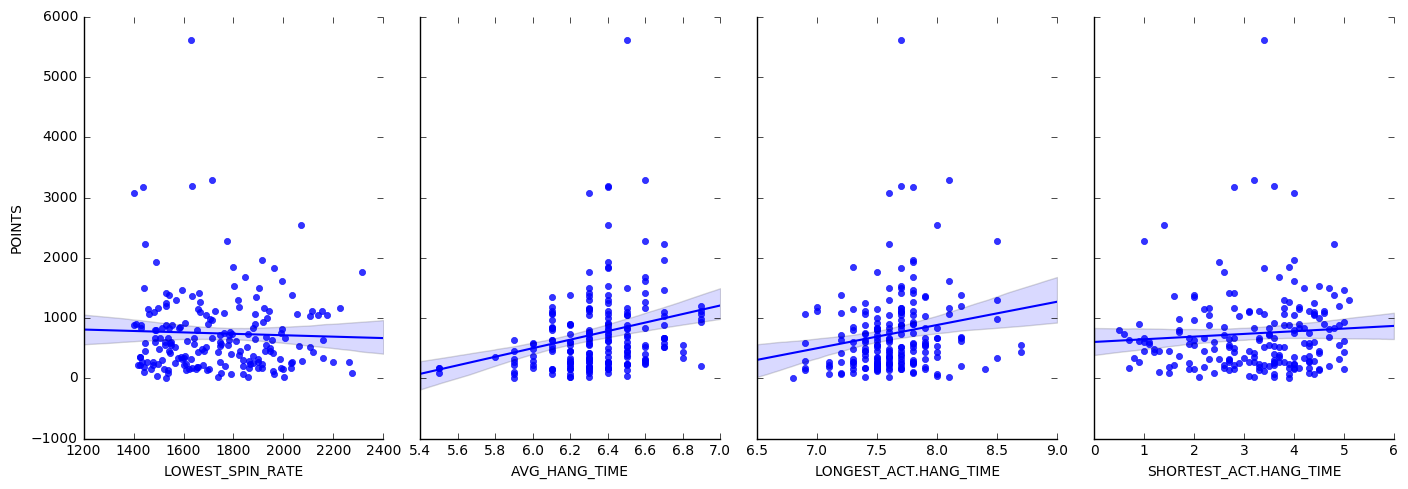

['AVG_CARRY_DISTANCE', 'LONGEST_CARRY_DISTANCE', 'SHORTEST_CARRY_DISTANCE', 'AVG_SCORE']


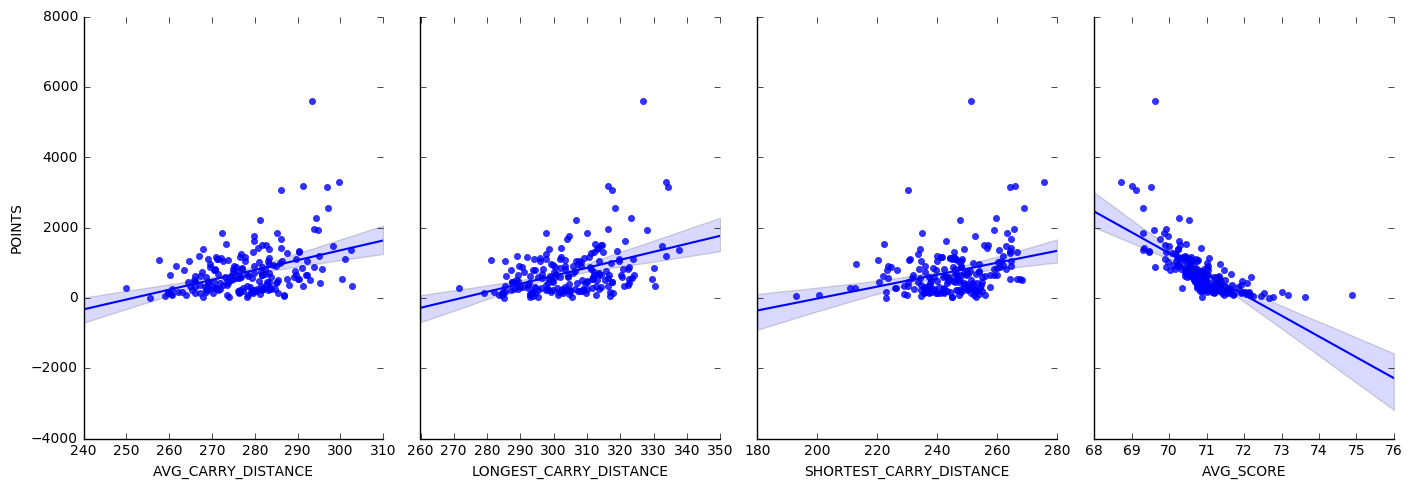

['TOTAL_STROKES', 'TOTAL_ROUNDS', 'MAKES_BOGEY%', 'BOGEYS_MADE']


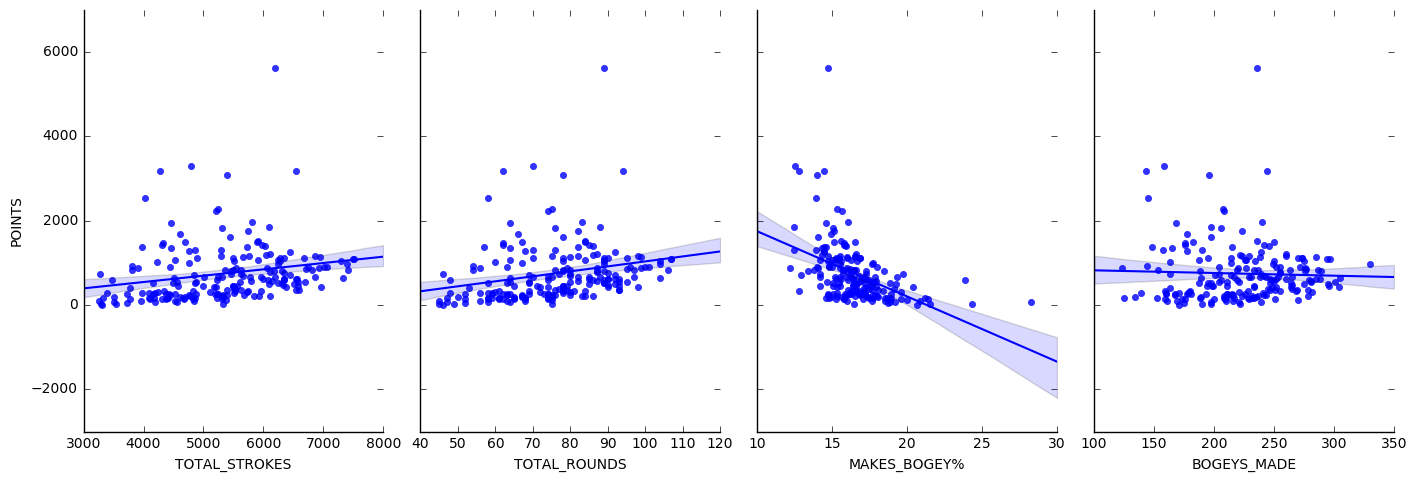

In [11]:
j = 0
x_vars = ["a"] * 4
for i in range(1, 71):
    if (df.columns.values[i]!='POINTS') & (df.columns.values[i]!='POINTS_BEHIND_LEAD')& ((df[df.columns.values[i]].dtype == 'int64') | (df[df.columns.values[i]].dtype == 'float64')) :
        x_vars[j] = df.columns.values[i]
        j = j + 1
        if j==4:
            print(x_vars)
            sns.pairplot(df, x_vars = x_vars, y_vars='POINTS',kind="reg", size=5, aspect=0.7)
            plt.show()
            x_vars = x_vars = ["a"] * 4
            j = 0

The distribution of POINTS.

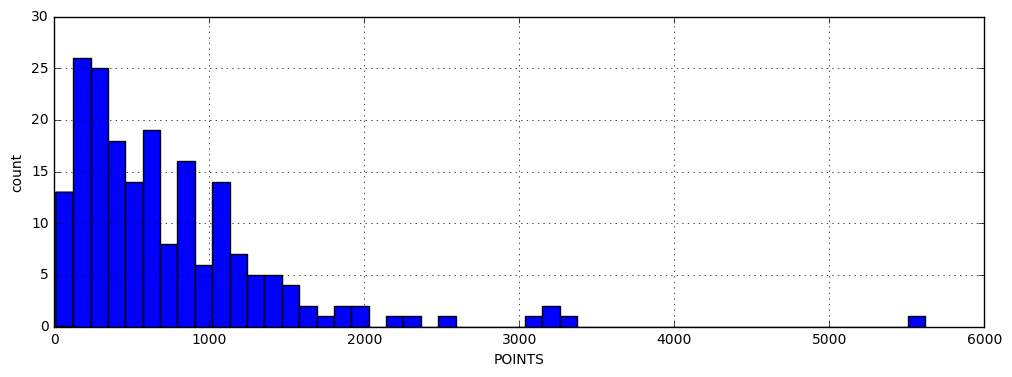

In [12]:
df.POINTS.hist(bins=50, figsize=(12,4))
plt.xlabel('POINTS')
plt.ylabel('count')

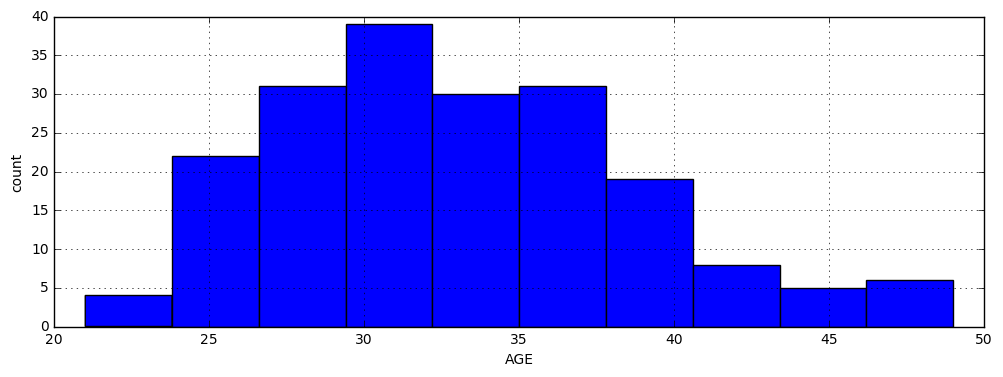

In [13]:
df.AGE.hist(bins=10, figsize=(12,4))
plt.xlabel('AGE')
plt.ylabel('count')

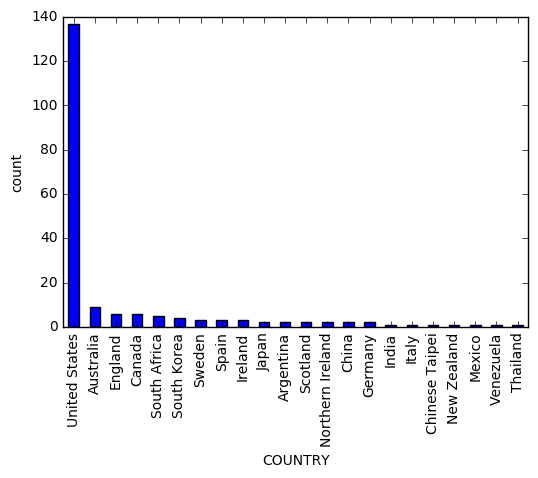

In [14]:
df['COUNTRY'].value_counts().plot.bar()
plt.xlabel('COUNTRY')
plt.ylabel('count')

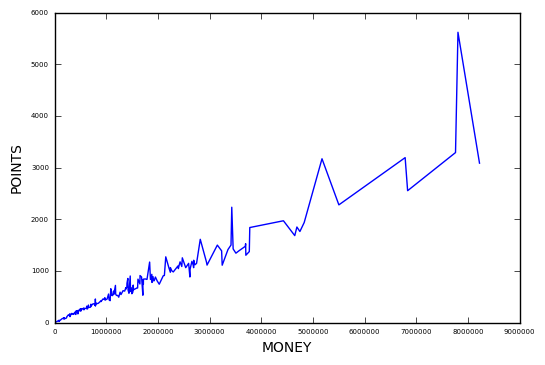

In [15]:
df_money_sort = df.sort_values(by="MONEY" , ascending=True) 
plt.plot(df_money_sort['MONEY'], df_money_sort['POINTS'])
plt.tick_params(labelsize=5)
plt.xlabel('MONEY')
plt.ylabel('POINTS')

# Data encoding

In [16]:
# label encoding

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['COUNTRY'] = le.fit_transform(df['COUNTRY'])
df['COUNTRY']

0       1
1      20
2      11
3       2
4      20
5       1
6       6
7      18
8      20
9      20
10     20
11      7
12     20
13     20
14     20
15     20
16      2
17     20
18     20
19     20
20     20
21     15
22     20
23     20
24     20
25     20
26     20
27     20
28     20
29     20
30     20
31     20
32     20
33     20
34     20
35     16
36      4
37      1
38      1
39     20
40     20
41     15
42     20
43     20
44     20
45     20
46     20
47     20
48     20
49     20
50      2
51     20
52     20
53     20
54     12
55      2
56     18
57     20
58     20
59     20
60     20
61      0
62     20
63      0
64      9
65     20
66     13
67     20
68      1
69     20
70     20
71     18
72     10
73     20
74     20
75      5
76     20
77     20
78     20
79     20
80     20
81     20
82      1
83     20
84     20
85     21
86     20
87     20
88     20
89     20
90     20
91     17
92     20
93     20
94     20
95     20
96      5
97     20
98     20
99     20


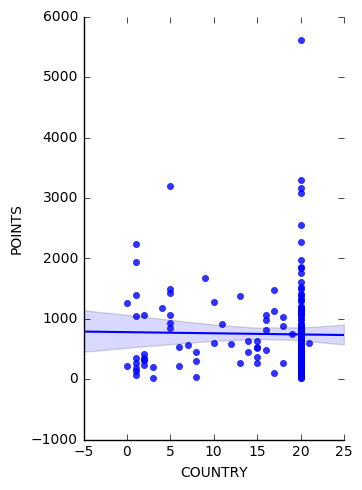

In [17]:
sns.pairplot(df, x_vars=['COUNTRY'], y_vars='POINTS',kind="reg", size=5, aspect=0.7)
plt.show()

One-hot encoding

In [18]:
Country_onehot = pd.get_dummies(df['COUNTRY'])
Country_onehot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# RFE

Because the following variables don't have a relation or have inverse causality with POINTS, we drop them off.

In [19]:
predictors = df.columns.drop(['Player','NUMBER_OF_WINS', 'NUMBER_OF_TOP_Tens', 'POINTS', 'COUNTRY', 'POINTS_BEHIND_LEAD', 'MONEY'])
x = df[predictors]
y = df['POINTS']

In [20]:
from sklearn import preprocessing
x_scale = preprocessing.scale(x)

In [21]:
x = pd.DataFrame(x_scale)
x.columns = df.columns.drop(['Player','NUMBER_OF_WINS', 'NUMBER_OF_TOP_Tens', 'POINTS', 'COUNTRY', 'POINTS_BEHIND_LEAD', 'MONEY'])
x.describe()

,EVENTS_PLAYED,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,AVG_Driving_DISTANCE,UP_AND_DOWN_%,PAR_OR_BETTER,MISSED_GIR,FAIRWAY_HIT_%,FAIRWAYS_HIT,POSSIBLE_FAIRWAYS,GIR_RANK,GOING_FOR_GREEN_IN_2%,ATTEMPTS_GFG,NON-ATTEMPTS_GFG,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,HOLE_OUTS,SAND_SAVE%,NUMBER_OF_SAVES,NUMBER_OF_BUNKERS,TOTAL_O/U_PAR,Three_PUTT%,TOTAL_3_PUTTS,...,AVG_BALL_SPEED,FASTEST_BALL_SPEED,SLOWEST_BALL_SPEED,AVG_SMASH_FACTOR,HIGHEST_SF,LOWEST_SF,AVG_LAUNCH_ANGLE,LOWEST_LAUNCH_ANGLE,STEEPEST_LAUNCH_ANGLE,AVG_SPIN_RATE,HIGHEST_SPIN_RATE,LOWEST_SPIN_RATE,AVG_HANG_TIME,LONGEST_ACT.HANG_TIME,SHORTEST_ACT.HANG_TIME,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,1.312341e-16,-4.156220e-16,2.277381e-18,-1.138690e-17,1.138690e-18,4.111811e-15,-3.211107e-16,-5.067172e-16,6.490535e-17,3.176946e-16,1.605553e-16,1.503071e-16,6.376666e-17,-1.816211e-16,1.389202e-16,-3.643809e-17,2.322928e-16,1.821904e-17,-3.757678e-17,-4.139139e-16,2.106577e-16,1.708035e-17,-1.821904e-16,3.712130e-16,-6.661338e-17,...,3.711561e-15,8.784426e-15,1.710882e-15,8.294220e-15,3.820306e-14,6.581630e-16,1.015874e-15,8.812395e-17,-6.260995e-16,-6.279877e-16,-1.420516e-16,3.131398e-16,-4.957857e-15,-1.283873e-15,-5.943963e-16,1.052150e-15,-5.682065e-16,1.024821e-16,-9.947598e-15,-2.846726e-17,4.065124e-16,1.582779e-15,-1.485991e-16,-1.252559e-17,-8.198570e-17
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,...,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-2.215416e+00,-2.310845e+00,-2.560619e+00,-2.505586e+00,-2.143598e+00,-2.246804e+00,-4.210496e+00,-2.266489e+00,-2.434043e+00,-3.987739e+00,-2.539032e+00,-2.409028e+00,-1.721187e+00,-3.057087e+00,-2.480702e+00,-1.994675e+00,-2.774033e+00,-4.483693e+00,-2.306091e+00,-2.793193e+00,-2.407136e+00,-2.318707e+00,-1.923513e+00,-2.163298e+00,-2.518448e+00,...,-2.165681e+00,-2.420498e+00,-2.822149e+00,-4.612198e+00,-7.316882e+00,-3.595205e+00,-2.842575e+00,-3.536678e+00,-2.573201e+00,-2.426739e+00,-1.664836e+00,-1.539284e+00,-3.361461e+00,-2.532101e+00,-2.350455e+00,-2.825723e+00,-2.670233e+00,-3.968853e+00,-2.677171e+00,-2.062230e+00,-2.113711e+00,-2.050076e+00,-2.384643e+00,-2.113896e+00,-2.102469e+00
25%,-7.665413e-01,-8.111763e-01,-6.330665e-01,-6.094045e-01,-7.827292e-01,-6.985013e-01,-6.127306e-01,-7.913921e-01,-7.431516e-01,-7.497981e-01,-7.116019e-01,-7.865043e-01,-8.599105e-01,-6.297234e-01,-6.809784e-01,-7.175359e-01,-5.640621e-01,-5.293284e-01,-6.909989e-01,-6.871920e-01,-7.091268e-01,-7.306487e-01,-7.017375e-01,-7.204995e-01,-6.870464e-01,...,-6.787244e-01,-6.626923e-01,-6.913357e-01,-3.369075e-01,-2.807416e-01,-5.616049e-01,-6.205526e-01,-6.890866e-01,-7.173500e-01,-6.01978

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
from sklearn.feature_selection import RFE

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
def model_worth(true_y,predicted_y):
    print ("\t Root mean squared error = %0.2f" % (mean_squared_error(true_y,predicted_y))**0.5)
    return mean_squared_error(true_y,predicted_y)**0.5

In [24]:
def build_model_rfe(x,y,no_features):
    model = LinearRegression(normalize=True,fit_intercept=True)
    rfe_model = RFE(estimator=model,n_features_to_select=no_features)
    rfe_model.fit(x,y)
    return rfe_model

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
x_test

,EVENTS_PLAYED,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,AVG_Driving_DISTANCE,UP_AND_DOWN_%,PAR_OR_BETTER,MISSED_GIR,FAIRWAY_HIT_%,FAIRWAYS_HIT,POSSIBLE_FAIRWAYS,GIR_RANK,GOING_FOR_GREEN_IN_2%,ATTEMPTS_GFG,NON-ATTEMPTS_GFG,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,HOLE_OUTS,SAND_SAVE%,NUMBER_OF_SAVES,NUMBER_OF_BUNKERS,TOTAL_O/U_PAR,Three_PUTT%,TOTAL_3_PUTTS,...,AVG_BALL_SPEED,FASTEST_BALL_SPEED,SLOWEST_BALL_SPEED,AVG_SMASH_FACTOR,HIGHEST_SF,LOWEST_SF,AVG_LAUNCH_ANGLE,LOWEST_LAUNCH_ANGLE,STEEPEST_LAUNCH_ANGLE,AVG_SPIN_RATE,HIGHEST_SPIN_RATE,LOWEST_SPIN_RATE,AVG_HANG_TIME,LONGEST_ACT.HANG_TIME,SHORTEST_ACT.HANG_TIME,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE
83,-0.525062,-0.525525,-0.264165,-0.250570,-0.854354,0.017512,0.162239,-0.575295,-0.645045,0.174905,-0.697213,-0.841252,0.818247,-0.111337,-0.522603,-0.345711,0.586965,0.281823,-1.152454,0.279682,-0.740000,-0.937787,-1.083542,1.626973,0.580847,...,-0.080464,-0.054917,-0.060259,1.159444,0.234098,1.372315,0.245782,-0.738289,0.050800,-0.220742,-0.117629,-0.963292,-0.187200,-0.418145,1.466143,-0.194862,0.908101,-0.812335,0.524875,-0.762746,-0.796862,0.586756,-0.437404,-0.797043,1.434903
12,0.923812,1.759685,0.821780,1.316165,2.010633,-0.521028,1.045445,2.544019,2.217350,1.035461,2.425246,2.140011,0.161191,-0.340634,1.579474,1.982240,-1.530924,0.788793,3.000639,0.615534,1.853324,1.651439,0.978203,0.067191,1.613945,...,-0.591768,-0.216991,-0.494176,0.731915,1.435390,1.068955,1.514473,2.047800,1.451907,-0.554563,-1.010983,-1.169003,0.606365,0.185842,-0.095193,-0.443996,-0.138243,-1.864508,-0.518447,2.168322,2.183375,-0.585701,1.726194,2.183204,-1.041257
33,-0.525062,0.260016,-0.270553,-0.275579,-0.138107,2.061516,-0.409247,-0.706832,-0.633503,-0.517882,-0.402234,-0.239027,-1.135164,1.668181,0.888380,-1.121694,-1.438842,-0.123753,0.001183,-0.506282,-0.431271,-0.247326,-0.472655,-0.665907,-0.546169,...,2.036057,1.889962,2.190171,0.589405,0.748938,-0.030725,0.898252,1.746435,0.265882,1.104005,0.616302,0.165835,1.003148,2.601792,-1.916750,1.618838,1.451241,1.116648,-0.785997,-0.082587,-0.034476,-0.552202,-0.365284,-0.034654,1.081166
113,0.923812,0.117190,-0.660215,-0.728706,0.434890,-0.215039,-0.977847,-0.143101,0.151347,-0.281032,-0.035309,0.089460,0.107916,-0.035636,0.110900,0.139279,0.356759,0.484611,0.231911,-1.404773,-0.986983,-0.488988,0.596399,-0.712701,-0.546169,...,0.190841,-0.025606,0.268067,-0.265653,-0.967194,0.462235,-0.181948,-0.147860,0.259737,0.592019,0.121137,-1.456999,0.606365,-0.418145,0.338512,0.124031,-0.593522,0.155969,0.474786,0.058033,0.034832,0.577185,0.476115,0.034654,-0.864389
171,0.199375,0.617080,-1.267067,-1.435266,0.506515,0.164386,-0.839305,0.326675,0.624566,-0.681704,0.576233,1.005240,-0.886548,-0.227631,-0.004282,0.268610,-0.241775,0.890187,0.924093,-0.111569,0.433171,0.546703,0.672760,0.004799,0.580847,...,0.314319,0.326127,-0.179050,-0.265653,0.234098,-1.433765,-1.146153,-1.334869,-0.920142,0.293639,0.084404,0.234405,-0.187200,-0.116151,-1.309564,-0.264619,0.101378,0.476195,-0.553876,0.782073,0.797218,-0.097576,0.788635,0.797043,2.142377
134,0.682333,0.402841,0.345881,0.444334,0.721389,0.274542,-0.934552,-0.067937,0.220599,-1.230407,0.029443,0.622006,-0.939823,-0.210078,0.600425,0.818265,-0.057610,-1.644662,0.693365,-1.314751,-0.925237,-0.454465,0.138233,-0.088788,0.393011,...,0.363014,0.327851,0.650838,-0.123143,0.062485,-0.030725,-0.442936,-0.553780,-0.428525,0.061353,-0.267501,-0.945006,-0.187200,0.185842,-0.442156,0.253581,0.652505,0.903164,-0.051762,0.651427,0.658602,-0.317711,0.476115,0.658427,-1.041257
163,0.923812,0.545667,1.425438,1.627169,0.434890,0.715166,1.501480,1.040735,0.589940,-1.157378,-0.143228,0.368175,0.534114,0.087240,0.398856,0.236277,-0.379898,-1.036298,-0.229544,1.905276,0.988883,0.132427,-0.854459,-0.244766,-0.076579,...,1.422145,1.639955,1.188697,0.660660,0.062485,0.234715,-1.015659,-1.32871

In [27]:
choosen_model = build_model_rfe(x_train,y_train,10)
predicted_y = choosen_model.predict(x_train)
rmse = model_worth(y_train,predicted_y)
predicted_test_y = choosen_model.predict(x_test)
model_worth(y_test,predicted_test_y)    

	 Root mean squared error = 475.69
	 Root mean squared error = 413.44


413.4442531835058

In [28]:
x.columns[choosen_model.support_]

Index(['UP_AND_DOWN_%', 'PAR_OR_BETTER', 'MISSED_GIR', 'SG_PER_ROUND',
       'SG:OTT', 'SG:APR', 'SG:ARG', 'TOTAL_STROKES', 'TOTAL_ROUNDS',
       'MAKES_BOGEY%'],
      dtype='object')

In [29]:
choosen_model.ranking_

array([15, 51, 18, 41,  5, 24,  1,  1,  1, 22, 14, 27, 17, 11, 40,  6,  7,
       37, 54, 31, 33, 34, 38, 53, 39,  1,  1,  1,  1, 36, 35, 16, 44, 20,
       49, 21,  9, 12, 43,  3,  2, 19, 10, 13, 50, 46, 48, 47, 25, 29, 30,
       45, 23, 55, 26, 52, 28,  8,  1,  1,  1,  4, 32, 42])

In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predicted_test_y)
score

0.46616187446612467

# Linear regression

In [31]:
predictors = [
'SG_PUTTING_PER_ROUND',
'AVG_Driving_DISTANCE',
'UP_AND_DOWN_%',
'GIR_RANK',
'GOING_FOR_GREEN_IN_2%',
'ATTEMPTS_GFG',
'SG_PER_ROUND',
'TOTAL_DRIVES_FOR_320+',
'AVG_CLUB_HEAD_SPEED',
'AVG_HANG_TIME',
'AVG_SCORE',
'MAKES_BOGEY%',
]
x = df[predictors]
y = df['POINTS']

In [32]:
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score

In [33]:
reg=linear_model.LinearRegression(fit_intercept=True,normalize=False)

In [34]:
r2 = cross_val_score(reg, x, y, scoring='r2',cv=5, n_jobs=1) 

In [35]:
r2.mean()

0.5319706913675715

# Ridge regression

Because the model works worse with normlization, i didn't do it here.

In [36]:
predictors = [
'SG_PUTTING_PER_ROUND',
'AVG_Driving_DISTANCE',
'UP_AND_DOWN_%',
'GIR_RANK',
'GOING_FOR_GREEN_IN_2%',
'ATTEMPTS_GFG',
'SG_PER_ROUND',
'TOTAL_DRIVES_FOR_320+',
'AVG_CLUB_HEAD_SPEED',
'AVG_HANG_TIME',
'AVG_SCORE',
'MAKES_BOGEY%',
]
x = df[predictors]
y = df['POINTS']

In [37]:
print(x.shape)

(195, 12)


In [38]:
from sklearn.cross_validation import KFold,train_test_split
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [39]:
def view_model(model):
    print ("\n model coeffiecients")
    print ("======================\n")
    for i,coef in enumerate(model.coef_):
        print ("\t coefficent %d %0.3f" % (i+1,coef))
    print ("\n\t intercept %0.3f" % (model.intercept_))

In [40]:
def display_param_results(param_results):
    a = []
    rmse = []
    num = 1
    for param_result in param_results:
        print ("num %d root mean squared error %0.2f" % (num,abs(param_result[1])**0.5),param_result[0])
        a.append(param_result[0]['alpha'])
        rmse.append(abs(param_result[1])**0.5)
        num+=1
    plt.plot(a, rmse)

α is an other form of λ.

In [41]:
def build_model(x,y):
    kfold = KFold(y.shape[0],5)
    model = Ridge(normalize=True)
    alpha_range = np.linspace(0.00001,1,30)
    grid_param = {"alpha":alpha_range}
    grid = GridSearchCV(estimator=model,param_grid=grid_param,cv=kfold,scoring='mean_squared_error')
    grid.fit(x,y)
    print(grid.grid_scores_[0][0])
    display_param_results(grid.grid_scores_)
    print(grid.best_params_)
    return grid.best_estimator_

In [42]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lenovo\Anaconda3\lib\si

{'alpha': 1e-05}
num 1 root mean squared error 721.59 {'alpha': 1e-05}
num 2 root mean squared error 453.22 {'alpha': 0.03449241379310345}
num 3 root mean squared error 443.62 {'alpha': 0.06897482758620689}
num 4 root mean squared error 440.50 {'alpha': 0.10345724137931034}
num 5 root mean squared error 439.64 {'alpha': 0.1379396551724138}
num 6 root mean squared error 439.85 {'alpha': 0.17242206896551726}
num 7 root mean squared error 440.66 {'alpha': 0.2069044827586207}
num 8 root mean squared error 441.82 {'alpha': 0.24138689655172413}
num 9 root mean squared error 443.21 {'alpha': 0.2758693103448276}
num 10 root mean squared error 444.75 {'alpha': 0.31035172413793105}
num 11 root mean squared error 446.38 {'alpha': 0.3448341379310345}
num 12 root mean squared error 448.07 {'alpha': 0.3793165517241379}
num 13 root mean squared error 449.78 {'alpha': 0.4137989655172414}
num 14 root mean squared error 451.51 {'alpha': 0.44828137931034484}
num 15 root mean squared error 453.24 {'alpha'

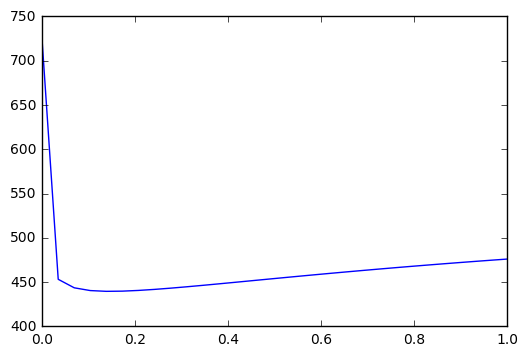

In [43]:
poly_features = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
choosen_model = build_model(x_train_poly,y_train)

In [44]:
predicted_train_y = choosen_model.predict(x_train_poly)
model_worth(y_train,predicted_train_y)

	 Root mean squared error = 382.25


382.24607170979783

In [45]:
predicted_test_y = choosen_model.predict(x_test_poly)
model_worth(y_test,predicted_test_y)

	 Root mean squared error = 339.24


339.2417848582008

In [46]:
def draw_result(result):
    plt.plot(range(len(result)), result['POINTS'], 'r')
    plt.plot(range(len(result)), result['predicted'], 'b')

In [47]:
def make_result(y,predicted_y):
    result = pd.DataFrame(y)
    result['predicted'] = predicted_y
#     result['error'] = abs(result['POINTS']-result['predicted'])/result['POINTS']
    result = result.sort_values(by="POINTS" , ascending=True) 
    plt.scatter(range(len(predicted_y)), result['POINTS'], alpha=0.8, c='g')
    plt.scatter(range(len(predicted_y)), result['predicted'], alpha=0.1, c='r')
    for i in range(len(predicted_y)):
         plt.plot([i,i],[result.loc[result.index[i],'POINTS'],result.loc[result.index[i],'predicted']], c='b')
    print(result)
    return result

     POINTS    predicted
108      10   184.479916
10       16   158.823572
194      21    -1.438296
129      29    -9.079957
148      64   121.043487
168      74   -18.113199
39       88   -16.514625
53       89  -368.225018
49       92   168.891597
147     107   238.817524
119     113    33.464460
68      133    -3.997252
48      141   136.071352
93      147   209.110391
144     148   270.539320
25      149   399.515999
146     155   176.566905
62      157    54.985540
51      162   128.977674
94      166   319.952679
192     176   466.899272
59      190   645.741017
191     195    51.930262
20      202   425.724472
169     211   317.826848
115     215   118.705255
187     219   365.607180
77      239   -18.872747
73      245    29.732414
47      255   430.490512
140     261   256.218473
17      262   432.319964
120     264   512.575795
15      266   572.798334
14      267   485.374684
57      267   480.489308
86      291   688.538595
165     296   618.200452
58      316   365.409728


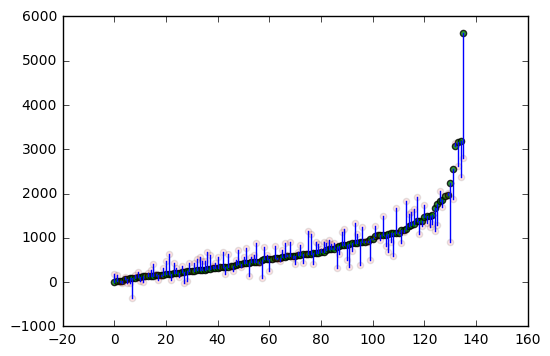

In [48]:
result_train = make_result(y_train,predicted_train_y)
# print(result_train['error'].mean())

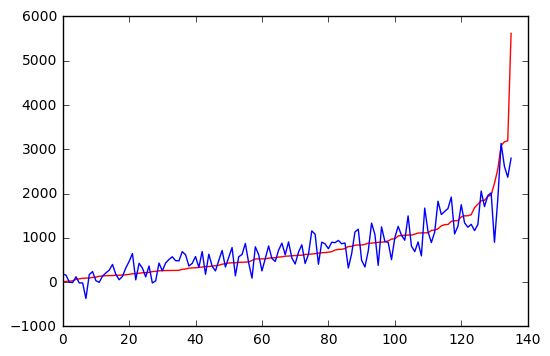

In [49]:
draw_result(result_train)

     POINTS    predicted
118      44   -30.420721
19       73   342.450489
170     138   192.839542
143     164   371.582682
92      167   306.790804
124     168   463.528757
109     175   345.783807
37      191   402.623682
63      221   422.260652
136     226   737.863394
113     227   432.260619
74      234   522.640536
4       239   358.208294
166     268   502.682876
125     272   179.363249
66      274   970.418559
56      274   608.839386
123     280   318.050840
173     308   478.988938
55      315   218.881344
90      338   805.725378
40      361   227.272320
160     422   166.835108
185     445   651.706230
163     455   766.143863
89      480   788.948854
141     498   470.398106
150     521   886.535186
22      545   979.925600
83      557   478.830242
181     616   730.169567
80      666   653.857426
101     667   788.688299
122     675   279.609123
30      718   895.299019
106     746   807.554432
171     775   651.772954
155     806  1015.479273
110     826   870.574990


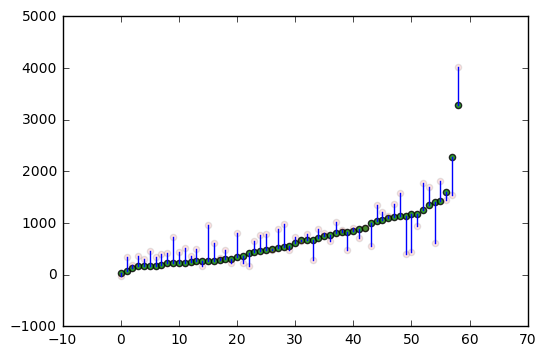

In [50]:
result_test = make_result(y_test, predicted_test_y)
# print(result_test['error'].mean())

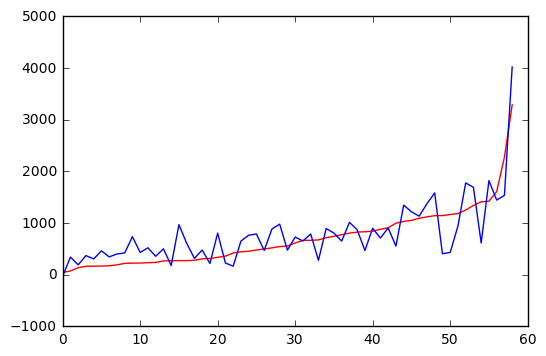

In [51]:
draw_result(result_test)

In [52]:
score = r2_score(y_test, predicted_test_y)
score

0.6405865323882083

# Lasso regression

Joy - 06/2019

In [53]:
predictors = [
'SG_PUTTING_PER_ROUND',
'AVG_Driving_DISTANCE',
'UP_AND_DOWN_%',
'GIR_RANK',
'GOING_FOR_GREEN_IN_2%',
'ATTEMPTS_GFG',
'SG_PER_ROUND',
'TOTAL_DRIVES_FOR_320+',
'AVG_CLUB_HEAD_SPEED',
'AVG_HANG_TIME',
'AVG_SCORE',
'MAKES_BOGEY%',
]
x = df[predictors]
y = df['POINTS']

In [54]:
from sklearn.cross_validation import KFold,train_test_split
from sklearn.linear_model import Lasso
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [55]:
def build_model(x,y):
    kfold = KFold(y.shape[0],5)
    model = Lasso(normalize=True)
    alpha_range = np.linspace(0.1,10,30)
    grid_param = {"alpha":alpha_range}
    grid = GridSearchCV(estimator=model,param_grid=grid_param,cv=kfold,scoring='mean_squared_error')
    grid.fit(x,y)
    print(grid.grid_scores_[0][0])
    display_param_results(grid.grid_scores_)
    print(grid.best_params_)
    return grid.best_estimator_

In [56]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lenovo\Anaconda3\lib\si

{'alpha': 0.1}
num 1 root mean squared error 526.06 {'alpha': 0.1}
num 2 root mean squared error 461.06 {'alpha': 0.4413793103448276}
num 3 root mean squared error 455.18 {'alpha': 0.7827586206896552}
num 4 root mean squared error 451.52 {'alpha': 1.124137931034483}
num 5 root mean squared error 451.07 {'alpha': 1.4655172413793105}
num 6 root mean squared error 451.53 {'alpha': 1.806896551724138}
num 7 root mean squared error 452.46 {'alpha': 2.148275862068966}
num 8 root mean squared error 453.60 {'alpha': 2.4896551724137934}
num 9 root mean squared error 455.63 {'alpha': 2.831034482758621}
num 10 root mean squared error 459.07 {'alpha': 3.1724137931034484}
num 11 root mean squared error 464.02 {'alpha': 3.513793103448276}
num 12 root mean squared error 470.07 {'alpha': 3.855172413793104}
num 13 root mean squared error 475.50 {'alpha': 4.196551724137931}
num 14 root mean squared error 477.58 {'alpha': 4.537931034482758}
num 15 root mean squared error 478.98 {'alpha': 4.879310344827586

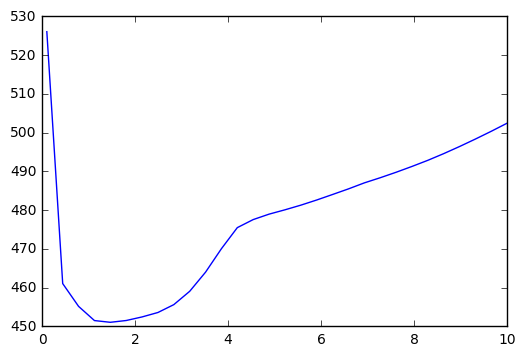

In [57]:
poly_features = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
choosen_model = build_model(x_train_poly,y_train)

In [58]:
predicted_train_y = choosen_model.predict(x_train_poly)
model_worth(y_train,predicted_train_y)

	 Root mean squared error = 386.49


386.4862241959257

In [59]:
predicted_test_y = choosen_model.predict(x_test_poly)
model_worth(y_test,predicted_test_y)

	 Root mean squared error = 328.61


328.6147873619707

     POINTS    predicted
108      10   182.982580
10       16   263.825765
194      21    14.015527
129      29   331.466022
148      64   135.754080
168      74    -9.428203
39       88    96.444726
53       89  -306.958489
49       92   304.319164
147     107   289.898834
119     113    36.468091
68      133   -14.242687
48      141   110.700059
93      147   323.382937
144     148   360.962790
25      149   411.164667
146     155   217.494993
62      157    80.577334
51      162   132.145147
94      166   294.654267
192     176   502.306006
59      190   567.619717
191     195    92.264017
20      202   491.518642
169     211   378.760581
115     215   124.569129
187     219   452.872948
77      239   205.312212
73      245    46.074744
47      255   357.397720
140     261   242.989303
17      262   475.288868
120     264   494.784235
15      266   553.258972
14      267   518.044049
57      267   522.460115
86      291   673.054179
165     296   633.939411
58      316   231.979284


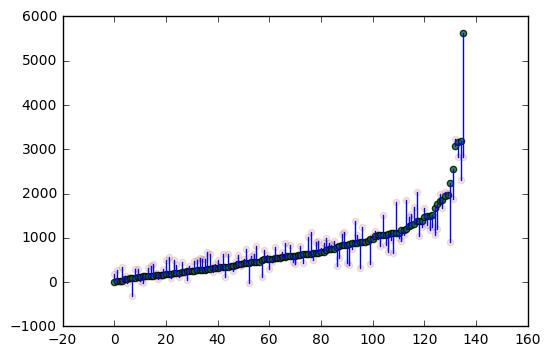

In [60]:
result_train = make_result(y_train,predicted_train_y)


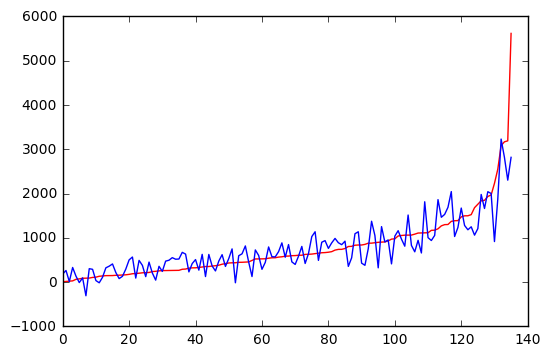

In [61]:
draw_result(result_train)

     POINTS    predicted
118      44    70.909323
19       73   374.335349
170     138   261.946037
143     164   366.721204
92      167   245.715327
124     168   521.400262
109     175   284.781992
37      191   474.102746
63      221   465.699338
136     226   726.003523
113     227   428.162626
74      234   553.034468
4       239   346.577002
166     268   508.025435
125     272   255.897081
66      274   799.674401
56      274   561.617576
123     280   430.847726
173     308   473.395585
55      315   348.381519
90      338   817.637136
40      361   193.413900
160     422   225.460599
185     445   603.207361
163     455   735.956624
89      480   706.955546
141     498   461.278555
150     521   824.194560
22      545   954.271325
83      557   420.170050
181     616   683.033438
80      666   667.263286
101     667   715.194248
122     675   382.261226
30      718   875.306123
106     746   601.961144
171     775   691.617246
155     806   936.409383
110     826   855.523850


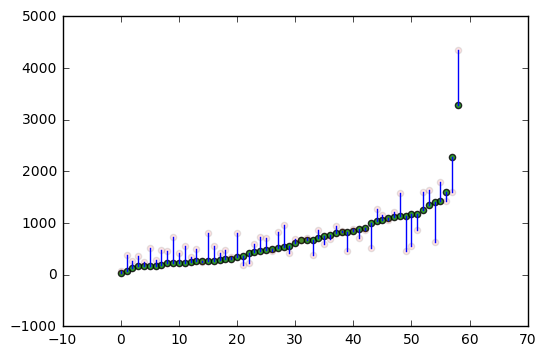

In [62]:
result_test = make_result(y_test, predicted_test_y)


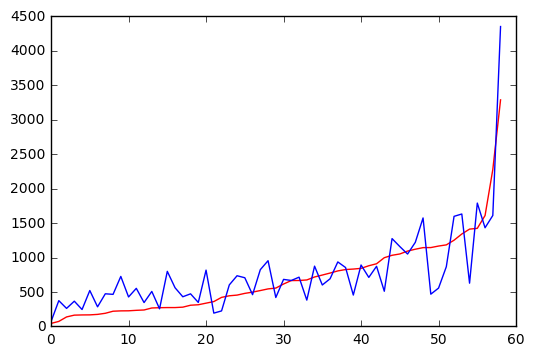

In [63]:
draw_result(result_test)

In [64]:
score = r2_score(y_test, predicted_test_y)
score

0.6627516198805987